In [12]:
import matplotlib.pyplot as plt

In [13]:
import numpy as np
X = np.array(list(range(1, 13))).reshape(3, 4)
X

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [14]:
THETA = np.pi / 12

# Eigen Decomposition

## Eigen vector matrix P

Define **P** as a row ordered matrix where the row $\overrightarrow{\boldsymbol{p_1}} = \left [ cos(\theta), sin(\theta) \right ]$ and $\overrightarrow{\boldsymbol{p_2}} = \left [ -sin(\theta), cos(\theta) \right ]$ are eigen vectors.

$\begin{bmatrix}cos(\theta) & sin(\theta) \\ -sin(\theta) & cos(\theta)\end{bmatrix}$



In [15]:
def get_eigen_vector_matrix(theta):
    return np.array([
        [np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]
    ])

In [16]:
P = get_eigen_vector_matrix(THETA)
print(P)

[[ 0.96592583  0.25881905]
 [-0.25881905  0.96592583]]


## Eigen value diagonal matrix D

D extends the eigen vector $\overrightarrow{\boldsymbol{p_1}}$ for $\lambda_1$ times and  $\overrightarrow{\boldsymbol{p_2}}$ for $\lambda_2$ times.

$D = \begin{bmatrix}\lambda_1 & 0 \\ 0 & \lambda_2 \end{bmatrix}$


In [17]:
D = np.array([
    [3, 0],
    [0, 2]
])
print(D)

[[3 0]
 [0 2]]


# Projection Matrix $A = PDP^{-1}$

Projection by the matrix $A \cdot \begin{bmatrix}x_1 \\ x_2 \end{bmatrix} = P \cdot D \cdot P^{-1} \cdot \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$ where:

1. $P^{-1} \cdot x$ maps the coefficients of $x = (x_1, x_2)$ in space **X** in purple into those of $u = (u_1, u_2)$ in space **U** in orange 
where the eigen vectors $(\overrightarrow{\boldsymbol{p_0}}, \overrightarrow{\boldsymbol{p_1}})$ are the basis vectors in **U**.
2. $D \cdot u$ extends the coefficent of $\overrightarrow{\boldsymbol{p_1}}$ by $\lambda_1$ times and that of $\overrightarrow{\boldsymbol{p_2}}$ by $\lambda_2$ times as $\begin{bmatrix}\lambda_0u_1 \\ \lambda_1u_2 \end{bmatrix}$.
3. $P$ projects $\begin{bmatrix}\lambda_1u_1 \\ \lambda_2u_2 \end{bmatrix}$ back to space **X**.

In [23]:
A = P @ D @ np.linalg.inv(P)
print(A)

[[ 2.9330127 -0.25     ]
 [-0.25       2.0669873]]


## Verify the eigen vector matrix P

In [24]:
l, e = np.linalg.eig(A)
print(l)      # eigen values lambda
print(e.T)    # eigen vectors e. Transpose to be row oriented

[3. 2.]
[[ 0.96592583 -0.25881905]
 [ 0.25881905  0.96592583]]


---
# Data

## Slope

In [25]:
slope = np.sin(THETA) / np.cos(THETA)
slope

0.2679491924311227

## Data points X

In [26]:
buf = []
for x in np.linspace(-1, 1):
    y = x * slope
    deviation = np.random.uniform(0.01, 0.8)
    buf.append([x, y * (1+deviation)])
    buf.append([x, y * (1-deviation)])
    
X = np.array(buf)

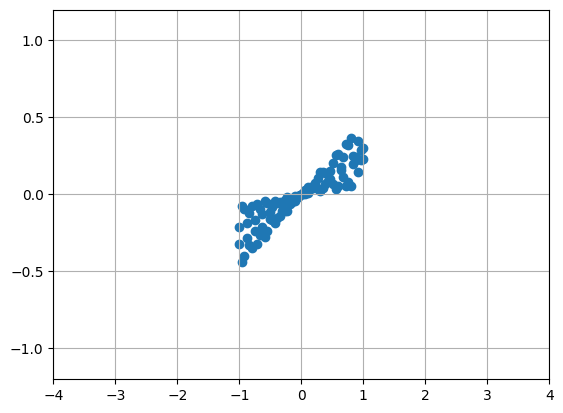

In [27]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)
plt.grid()

## Verify slope from X

In [13]:
C = np.cov(X[:, 0], X[:, 1])
C

array([[0.35044321, 0.09390097],
       [0.09390097, 0.03084116]])

In [14]:
_variance = C[0, 0]     # x0^2
_covariance = C[0, 1]   # x0*x1
_covariance / _variance # same with slope

0.2679491924311229

In [49]:
beta = np.divide(
    np.dot(X[:, 0].T, X[:, 1]),
    np.dot(X[:, 0].T, X[:, 0]),
)
beta    # Beta coefficient is the same with slope

0.2679491924311227

## Verify eigen vectors/values from X

In [15]:
Xl, Xe = np.linalg.eig(X.T @ X)
print(Xl)
print(Xe.T)   # Transpose to be row oriented

[37.22299592  0.52415668]
[[ 0.96492721  0.26251759]
 [-0.26251759  0.96492721]]


---
# Apply $ED(E^T)^{-1}$

## Projection $(E^T)^{-1} \cdot X$

$(E^T)^{-1}$ projects the data points X into space **U** where the correlation in X is removed.

In [55]:
print(np.linalg.inv(E.T).shape)
print(X.T.shape)

(2, 2)
(2, 100)


In [56]:
X_rotated = (np.linalg.inv(E.T) @ X.T).T
X_rotated.shape

(100, 2)

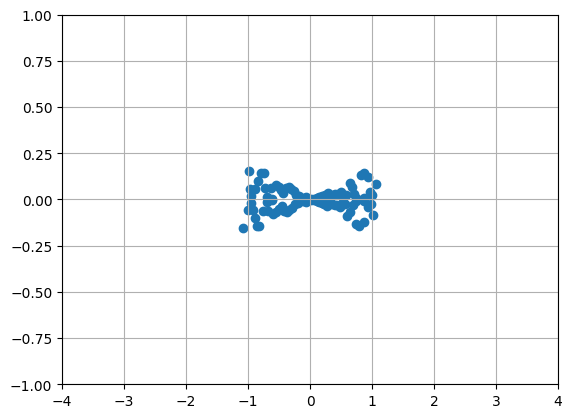

In [57]:
plt.scatter(X_rotated[:, 0], X_rotated[:, 1])
plt.xlim(-4, 4)
plt.ylim(-1, 1)
plt.grid()

## Extension $D \cdot U$

$D$ extends the coefficents $(u_0, u_1)$ to $(\lambda_0u_0, \lambda_1u_1)$.

In [58]:
X_rorated_extended = (D @ X_rotated.T).T
X_rorated_extended.shape

(100, 2)

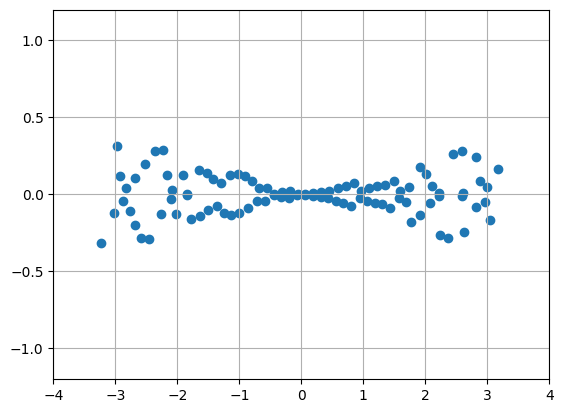

In [59]:
plt.scatter(X_rorated_extended[:, 0], X_rorated_extended[:, 1])
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)
plt.grid()

## Reversion $E^T \cdot \lambda U$

$E^T$ projects the $\lambda U$ back to space **X**.

In [60]:
print(E.T.shape)
print(X_rorated_extended.shape)

(2, 2)
(100, 2)


In [61]:
X_rorated_extended_reversed = (E.T @ X_rorated_extended.T).T
X_rorated_extended_reversed.shape

(100, 2)

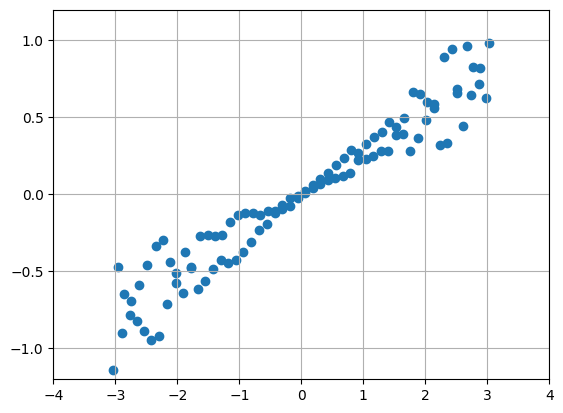

In [62]:
plt.scatter(X_rorated_extended_reversed[:, 0], X_rorated_extended_reversed[:, 1])
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)
plt.grid()

---
# Apply project matrix A

In [63]:
Y = (A @ X.T).T
Y.shape

(100, 2)

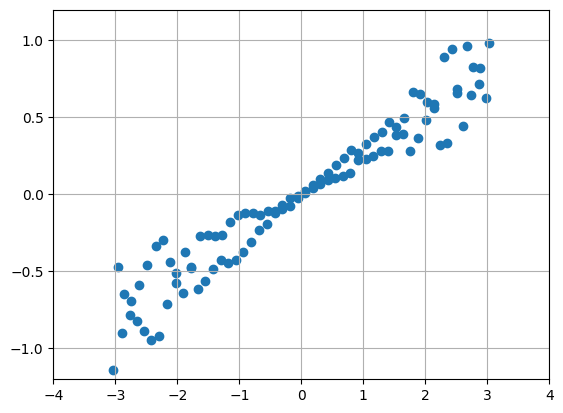

In [64]:
plt.scatter(Y[:, 0], Y[:, 1])
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)
plt.grid()